In [2]:
import pandas as pd
import numpy.linalg as la
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
# import data
anomalia = pd.read_csv('Anomalia.csv')
anomalia.columns = ['S','M1','M2','M3','M4',]
print(anomalia)

      S    M1    M2    M3    M4
0    X1   375   135   458   475
1    X2    57    47    53    73
2    X3   245   267   242   227
3    X4  1472  1494  1462  1582
4    X5   105    66   103   103
5    X6    54    41    62    64
6    X7   193   209   184   235
7    X8   147    93   122   160
8    X9  1102   674   957  1137
9   X10   720  1033   566   874
10  X11   253   143   171   265
11  X12   685   586   750   803
12  X13   488   355   418   570
13  X14   198   187   220   203
14  X15   360   334   337   365
15  X16  1374  1506  1572  1256
16  X17   156   139   147   175


In [4]:
# drop col 'S'
anomalia = anomalia.drop('S',axis=1)

# convert dataset to float
anomalia = anomalia.astype('float64')

print(anomalia.head())

       M1      M2      M3      M4
0   375.0   135.0   458.0   475.0
1    57.0    47.0    53.0    73.0
2   245.0   267.0   242.0   227.0
3  1472.0  1494.0  1462.0  1582.0
4   105.0    66.0   103.0   103.0


In [5]:
# split data table into data X and class labels y

X = anomalia.iloc[:,0:3].values
y = anomalia.iloc[:,3].values

In [6]:
# covariance matrix
cov_anomalia = np.cov(np.transpose(anomalia))

print('Covariance matrix \n%s' %cov_anomalia)

Covariance matrix 
[[204938.61764706 205869.97794118 209380.40073529 208027.29044118]
 [205869.97794118 230300.18382353 212002.95220588 208593.68382353]
 [209380.40073529 212002.95220588 220520.31617647 210011.13970588]
 [208027.29044118 208593.68382353 210011.13970588 215165.43382353]]


In [7]:
# eigenvectors and eigenvalues 

eig_vals, eig_vecs = la.eig(cov_anomalia)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.49015722  0.28084203  0.82215915  0.07019969]
 [ 0.50726586 -0.85947138 -0.01409337  0.06157655]
 [ 0.50423561  0.24821973 -0.32029268 -0.76259165]
 [ 0.49817035  0.34759699 -0.47039166  0.64010493]]

Eigenvalues 
[8.44816766e+05 1.74405141e+04 8.19116586e+02 7.84815517e+03]


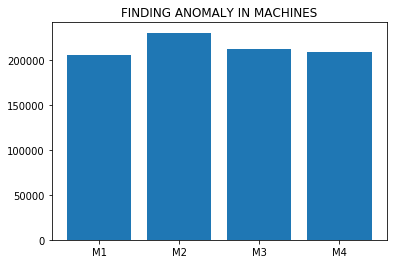

In [22]:
x = np.arange(4)

fig, ax = plt.subplots()
#ax.yaxis.set_major_formatter(formatter)
plt.bar(x, cov_anomalia[1])
ax.set_title('FINDING ANOMALY IN MACHINES')
plt.xticks(x, ('M1', 'M2', 'M3', 'M4'))
plt.show()

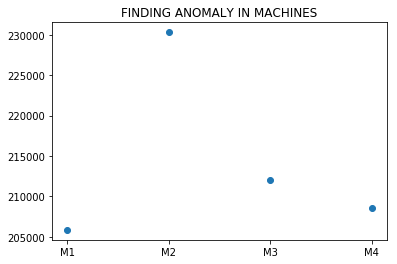

In [9]:
# Fixing random state for reproducibility
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(cov_anomalia[1], 'o')
ax.set_title('FINDING ANOMALY IN MACHINES')
plt.xticks(x, ('M1', 'M2', 'M3', 'M4'))
plt.show()

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
844816.7656696284
17440.514050269972
7848.155165147805
819.1165855427688


In [11]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.49015722  0.28084203]
 [ 0.50726586 -0.85947138]
 [ 0.50423561  0.24821973]
 [ 0.49817035  0.34759699]]


In [12]:
Y = anomalia.dot(matrix_w)

In [13]:
Y[0:10]

,0,1
0,719.860674,268.080331
1,114.871380,14.143067
2,490.638190,-21.698870
3,3004.664577,42.144906
4,188.193869,34.132424
5,110.411900,17.562974
6,410.468293,1.930716
7,260.452837,47.251265
8,1931.023612,362.968264
9,1597.717073,-241.335539
